# data science school 
~~~
pg 73
~~~

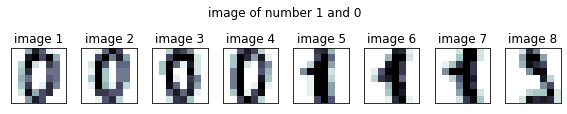

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits   #패키지 import

digitss=load_digits()                       #데이터 로드
samples=[0, 10, 20, 30, 1, 11, 21, 31]      #선택된 이미지 번호
d=[]                                        # 특정 번호 데이터들을 담는 곳

for i in range(8):
    d.append(digitss.images[samples[i]])    #선택 된 내용 list에 담기
    
plt.figure(figsize=(8, 2))                 #최초 창의 사이즈 설정 (가로, 세로 크기 설정)
for i in range(8):
    plt.subplot(1, 8, i+1)                 #그래프 여러개를 동시에 그리기 위해 (창 여러개 생성과 특정 창 지정)
                                           #세로 1개 가로 8개로 이루어진 틀 생성
                                           #i+1은 특정 틀을 지정하는 코드
            
    plt.imshow(d[i], interpolation='nearest', cmap=plt.cm.bone_r)    #imshow는 행렬(2차원 data)를 이미지로 표현
    #interpolation='None'등 이미지를 불러오는 다양한 방식 선택 가능
    #cmap= 색을 지정하는 코드이다.
    
    plt.grid(False); plt.xticks([]); plt.yticks([])   #grid(False)는 x, y축의 지표 표시 안함, 
                                                       #plt.xticks([]); plt.yticks([])는 지표 표시 내용을 비워두는 코드
    plt.title('image {}'.format(i+1))
    
    
plt.suptitle('image of number 1 and 0')    #이거 subtitle 아니고 suptitle
plt.tight_layout()
plt.show()

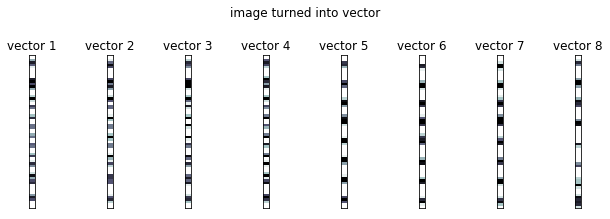

In [3]:
v=[]
for i in range(8):
    v.append(d[i].reshape(64, 1))    #벡터화

plt.figure(figsize=(8, 3))          #이미지 사이즈 조절
for i in range(8):
    plt.subplot(1, 8, i+1)          #테두리 개수 8개로 지정, 특정 테두리 호출
    plt.imshow(v[i], aspect=0.4, interpolation='nearest', cmap=plt.cm.bone_r)
    
    plt.grid(False); plt.xticks([]); plt.yticks([])     #가로 세로에 틀 수치(높이 등) 표시 안 하기
    plt.title('vector {}'.format(i+1))
    
plt.suptitle('image turned into vector', y=1.05)    #이거 subtitle 아니고 suptitle
plt.tight_layout(w_pad=7)
plt.show()

**plt.imshow(d[i], interpolation='nearest', cmap=plt.cm.bone_r)**
~~~
라는 코드 해석하기
~~~

**interpolation='none'은 큰 이미지가 축소될 때 잘 작동하고 interpolation='nearest'은 작은 이미지가 확대될 때 잘 작동한다**

~~~
Interpolations for imshow/matshow: 
This example displays the difference between interpolation methods for imshow() and matshow().

If interpolation is None, it defaults to the image.interpolation rc parameter. If the interpolation is 'none', then no interpolation is performed for the Agg, ps and pdf backends. Other backends will default to 'nearest'.

For the Agg, ps and pdf backends, interpolation = 'none' works well when a big image is scaled down, while interpolation = 'nearest' works well when a small image is scaled up.

출처:  https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/interpolation_methods.html
~~~

**추가) inshow의 기능 설명**
~~~
cmap: str or Colormap, default: rcParams["image.cmap"] (default: 'viridis')
The Colormap instance or registered colormap name used to map scalar data to colors. This parameter is ignored for RGB(A) data.

색에 대한 scalar data를 생성?!
~~~

**imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)[source]**
~~~
Display data as an image, i.e., on a 2D regular raster.

The input may either be actual RGB(A) data, or 2D scalar data, which will be rendered as a pseudocolor image. For displaying a grayscale image set up the color mapping using the parameters cmap='gray', vmin=0, vmax=255.

만약 갈색 계열의 이미지를 설정하고 싶다면 parameters cmap='gray', vmin=0, vmax=255를 사용해라

The number of pixels used to render an image is set by the axes size and the dpi of the figure. This can lead to aliasing artifacts when the image is resampled because the displayed image size will usually not match the size of X (see Image antialiasing). The resampling can be controlled via the interpolation parameter and/or rcParams["image.interpolation"] (default: 'antialiased').

픽셀의 개수는 xes size 와 the dpi of the figure로 인해 결정된다.
~~~

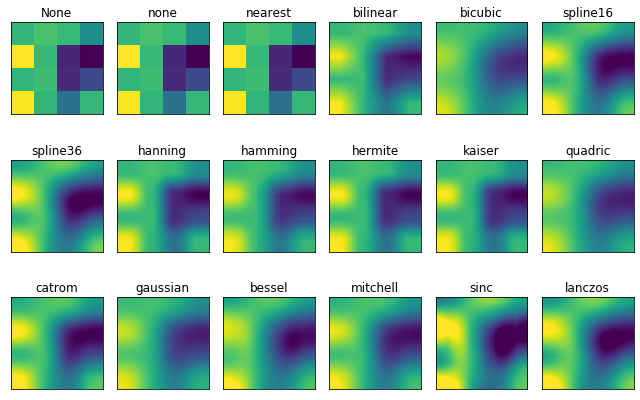

In [3]:
import numpy as np

methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

# Fixing random state for reproducibility
np.random.seed(19680801)

grid = np.random.rand(4, 4)   #4열 4행의 random한 숫자 (0~1 사이의 숫자인 것 같음)

# subplots (nrows, ncols, index, **kwargs)
# axs[0], axes[1]은 각각의 그래프를 개별적으로 호출 가능하다.
# nrows=3, ncols=6는 세로 3개 가로 6개의 칸이 생성됨을 의미한다.
fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),       
                        subplot_kw={'xticks': [], 'yticks': []})


#axs.flat에서 axes는 numpy array이다. 따라서 .flat는 numpy.ndarray를 flat하게 하는 역할을 한다. 
#(axes들을 1차원 list로 만드는 역할을 하는 것 같음)
#ax는 특정 틀을 순서대로 불러들임, interp_method는 method를 순서대로 불러들임
#
for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))         # interp_method는 method list안의 냐용

#plt.tight_layout(pad= 1.08, h_pad =None, w_pad=None, rect= None) 
#설명 출처: https://kongdols-room.tistory.com/98
plt.tight_layout()    #이 함수는 자동으로 명시된 여백에 관한 subplot parameter를 조정한다.
                      #이 함수에서의 모즌 키원드 인자는 선택적으로 입력 가능하다.
                      #입력 없이 사용할 경우 기존에 세팅된 기본겂을 이용하여 레이아웃을 설정한다.

plt.show()


**aspect**
~~~
{'equal', 'auto'} or float, default: rcParams["image.aspect"] (default: 'equal')
The aspect ratio of the axes. This parameter is particularly relevant for images since it determines whether data pixels are square.

This parameter is a shortcut for explicitly calling Axes.set_aspect. See there for further details.

'equal': Ensures an aspect ratio of 1. Pixels will be square (unless pixel sizes are explicitly made non-square in data coordinates using extent).
'auto': The axes is kept fixed and the aspect is adjusted so that the data fit in the axes. In general, this will result in non-square pixels.
~~~

# plt.imshow
~~~
# visualization
plt.imshow(image.reshape(3,3), cmap='Greys')

#OpenCV를 이용한 코드
import cv2
 
img = cv2.imread('IMG03.jpg')
print(img)
 
plt.imshow(img)
plt.show()
~~~

**plt.grid(False); plt.xticks([]); plt.yticks([])**
~~~
라는 코드 해석하기
~~~


~~~
Notes

Calling this function with no arguments (e.g. xticks()) is the pyplot equivalent of calling get_xticks and get_xticklabels on the current axes. Calling this function with arguments is the pyplot equivalent of calling set_xticks and set_xticklabels on the current axes.

결론: set_xticks = set_xticklabels (최근, 지정 axes에 대한)

출처:  https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.xticks.html
~~~

In [4]:
locs, labels = xticks()                                             # Get the current locations and labels.
xticks(np.arange(0, 1, step=0.2))                                   # Set label locations
xticks(np.arange(3), ['Tom', 'Dick', 'Sue'])                        # Set text labels.
xticks([0, 1, 2], ['January', 'February', 'March'], rotation=20)    # Set text labels and properties.
xticks([])  # Disable xticks.

NameError: name 'xticks' is not defined

**Secondary Axis**
~~~
Sometimes we want a secondary axis on a plot, for instance to convert radians to degrees on the same plot. We can do this by making a child axes with only one axis visible via axes.Axes.secondary_xaxis and axes.Axes.secondary_yaxis. This secondary axis can have a different scale than the main axis by providing both a forward and an inverse conversion function in a tuple to the functions kwarg:

출처:   https://matplotlib.org/3.3.0/gallery/subplots_axes_and_figures/secondary_axis.html#sphx-glr-gallery-subplots-axes-and-figures-secondary-axis-py
~~~

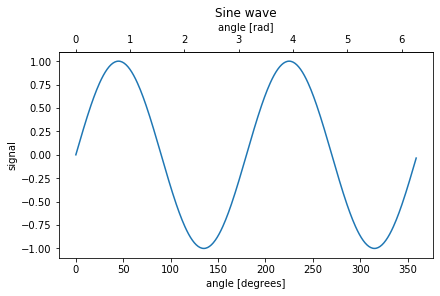

In [9]:
import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator

fig, ax = plt.subplots(constrained_layout=True)    #틀 생성 (fig, ax는 문자가 의미 있는것이 아니라 순서가 의미 있음)
                                                    #constrained_layout=True라는 코드는 알아서 그래프 틀간의 간격을 조정해 준다
                                                    #따라서 그래프 끼리 겹치게 그려지는 경우가

x = np.arange(0, 360, 1)                             #x 값들 지정        
y = np.sin(2 * x * np.pi / 180)                     #y 값들 지정
ax.plot(x, y)                                       #그래프 그리기

ax.set_xlabel('angle [degrees]')    #x 축의 제목
ax.set_ylabel('signal')             #y 축의 제목
ax.set_title('Sine wave')           #그래프 타이틀


def deg2rad(x):
    return x * np.pi / 180


def rad2deg(x):
    return x * 180 / np.pi

#secondary_xaxis은 지표가 여러 개일 때, 축을 여러개 만들 때 (위쪽에 angle [rad]라는 축 또 생성)
secax = ax.secondary_xaxis('top', functions=(deg2rad, rad2deg))   #deg2rad인 원해 x축의 지표를 rad2deg의 형식으로 바꾸기
                                                                  #이 그래프의 경우 각도를 radient로 바꾸어서 지표화 시킴
secax.set_xlabel('angle [rad]')
plt.show()

**constrained_layout=True**
~~~
위에 그래프의 fig, ax = plt.subplots(constrained_layout=True)의 기능 설명 중
~~~

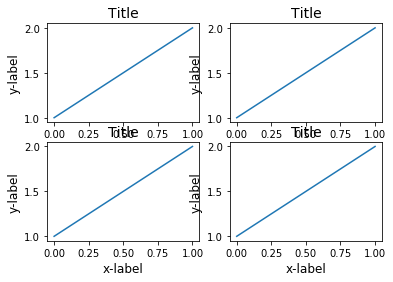

In [10]:
def example_plot(ax):
    ax.plot([1, 2])
    ax.set_xlabel('x-label', fontsize=12)
    ax.set_ylabel('y-label', fontsize=12)
    ax.set_title('Title', fontsize=14)

# constrained_layout=False인 경우
fig, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=False)

for ax in axs.flat:
    example_plot(ax)

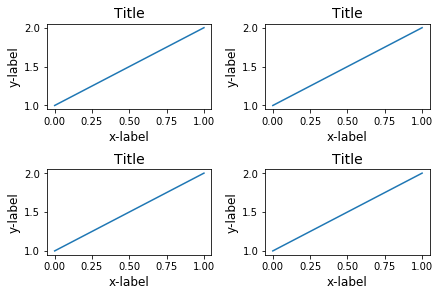

In [11]:
#constrained_layout=True 인 경우
fig, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=True)

#axes is a numpy array of axes, axes.flat is not a function, it's an attribute of the numpy.ndarray
for ax in axs.flat:
    example_plot(ax)

**Note**
~~~
In this case, the xscale of the parent is logarithmic, so the child is made logarithmic as well.
~~~

C:\Users\min20\miniconda3\lib\site-packages\numpy\ma\core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
C:\Users\min20\miniconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


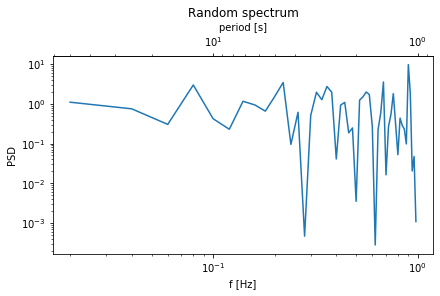

In [6]:
fig, ax = plt.subplots(constrained_layout=True)
x = np.arange(0.02, 1, 0.02)         #숫자 범위와 간격 지정하기
np.random.seed(19680801)
y = np.random.randn(len(x)) ** 2    #len(x)은 y data 개수가 x data 개수와 동일하게 하기 위해서 쓴 코드이다.
ax.loglog(x, y)                     #로그 그래프로 계산한다. 
ax.set_xlabel('f [Hz]')
ax.set_ylabel('PSD')
ax.set_title('Random spectrum')


def forward(x):
    return 1 / x


def inverse(x):
    return 1 / x


secax = ax.secondary_xaxis('top', functions=(forward, inverse))     #기존 값과 역수인 값을 또다른 지표로 사용한다.
                                                                    #주가와 주파수는 역수 관계이므로 이것을 이용하는 것
secax.set_xlabel('period [s]')
plt.show()

~~~
Sometime we want to relate the axes in a transform that is ad-hoc from the data, and is derived empirically. In that case we can set the forward and inverse transforms functions to be linear interpolations from the one data set to the other.
~~~

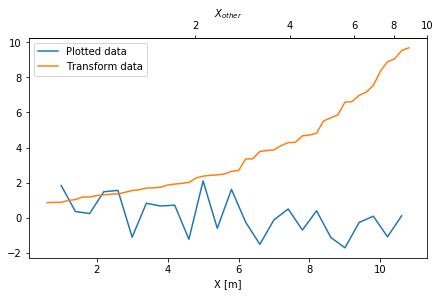

In [7]:
fig, ax = plt.subplots(constrained_layout=True)
xdata = np.arange(1, 11, 0.4)
ydata = np.random.randn(len(xdata))

#ax.plot(x 값, y 값, label=해당 그래프의 이름)
ax.plot(xdata, ydata, label='Plotted data')

xold = np.arange(0, 11, 0.2)

# fake data set relating x coordinate to another data-derived coordinate.
# xnew must be monotonic, so we sort...
xnew = np.sort(10 * np.exp(-xold / 4) + np.random.randn(len(xold)) / 3)
#np.exp는 밑이 e인 로그함수로 변환


ax.plot(xold[3:], xnew[3:], label='Transform data')
ax.set_xlabel('X [m]')
ax.legend()


def forward(x):
    return np.interp(x, xold, xnew)    #np.interp 함수는 xold와 xnew 사이 관계를 동일하게 적용하게 해줌
                                        #np.interp(새로운 x, 기존 x값, 기존 y 값)
                                        #기존 x값과 기존 y 값의 관계롤 동일하게 적용하여 새로운 x에 대한 함수 만들기

def inverse(x):
    return np.interp(x, xnew, xold)


secax = ax.secondary_xaxis('top', functions=(forward, inverse))  #'top'은 새로운 지표가 들어갈 위치 지정, 
                                                                 #functions=(기존 식, 변환 할 식)
secax.xaxis.set_minor_locator(AutoMinorLocator())
secax.set_xlabel('$X_{other}$')

plt.show()

**위에 코드 중 np.interp(x, xold, xnew) 이해를 위한 예시**

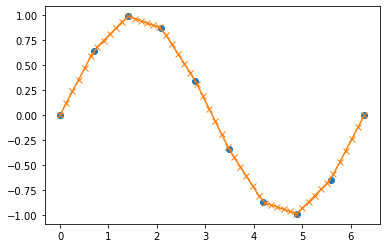

In [13]:
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)
xvals = np.linspace(0, 2*np.pi, 50)
yinterp = np.interp(xvals, x, y)

plt.plot(x, y, 'o')
plt.plot(xvals, yinterp, '-x')
plt.show()

NameError: name 'BMDOHYEON' is not defined

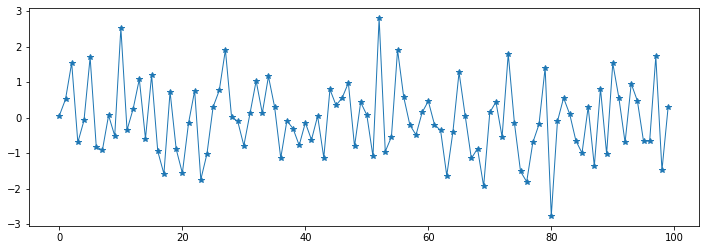

In [14]:
## plt.xticks()
plt.figure(figsize=(12, 4))
plt.plot(np.arange(0, 100, 1), np.random.normal(0, 1, 100), '*-', linewidth=1)

## 아래처럼 tick을 표시할 값을 먼저 넣어주고, 그 다음에 그 위치에 들어갈 값을 넣어줍니다. 
plt.xticks(np.arange(0, 100, step=5), ["x_{:0<2d}".format(x) for x in np.arange(0, 100, step=5)], 
           fontproperties=BMDOHYEON, 
           fontsize=20, 
           rotation=45
          )

plt.yticks([-2, 0, 2], 
           [ "y_{}".format(x) for x in [-2, 0, 2]], 
           fontproperties=BMJUA, 
           fontsize=15
          )

plt.savefig('../../assets/images/markdown_img/180801_plt_xticks.svg')
plt.show()

**아직 공부 못한 코드**
~~~
A final example translates np.datetime64 to yearday on the x axis and from Celsius to Fahrenheit on the y axis. Note the addition of a third y axis, and that it can be placed using a float for the location argument
~~~

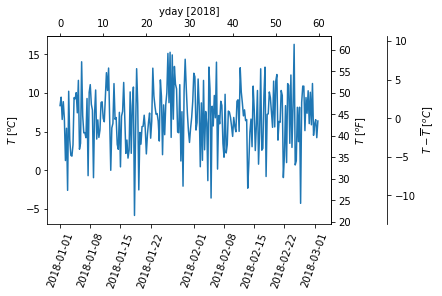

In [8]:
dates = [datetime.datetime(2018, 1, 1) + datetime.timedelta(hours=k * 6)
         for k in range(240)]
temperature = np.random.randn(len(dates)) * 4 + 6.7
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(dates, temperature)
ax.set_ylabel(r'$T\ [^oC]$')
plt.xticks(rotation=70)


def date2yday(x):
    """Convert matplotlib datenum to days since 2018-01-01."""
    y = x - mdates.date2num(datetime.datetime(2018, 1, 1))
    return y


def yday2date(x):
    """Return a matplotlib datenum for *x* days after 2018-01-01."""
    y = x + mdates.date2num(datetime.datetime(2018, 1, 1))
    return y


secax_x = ax.secondary_xaxis('top', functions=(date2yday, yday2date))
secax_x.set_xlabel('yday [2018]')


def celsius_to_fahrenheit(x):
    return x * 1.8 + 32


def fahrenheit_to_celsius(x):
    return (x - 32) / 1.8


secax_y = ax.secondary_yaxis(
    'right', functions=(celsius_to_fahrenheit, fahrenheit_to_celsius))
secax_y.set_ylabel(r'$T\ [^oF]$')


def celsius_to_anomaly(x):
    return (x - np.mean(temperature))


def anomaly_to_celsius(x):
    return (x + np.mean(temperature))


# use of a float for the position:
secax_y2 = ax.secondary_yaxis(
    1.2, functions=(celsius_to_anomaly, anomaly_to_celsius))
secax_y2.set_ylabel(r'$T - \overline{T}\ [^oC]$')


plt.show()